# Data Procressing of UV Spec

1. Files in a specific folder

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np 

# 指定要查詢的路徑
#yourPath = './TData/FC0930/'
yourPath = './data/FC0930/T0930/'


# 列出指定路徑底下所有檔案(包含資料夾)
allFileList = os.listdir(yourPath)

# 與listdir不同的是，listdir只是將指定路徑底下的目錄和檔案列出來
# walk的方式則會將指定路徑底下所有的目錄與檔案都列出來(包含子目錄以及子目錄底下的檔案)
allList = os.walk(yourPath)
# 列出所有子目錄與子目錄底下所有的檔案
for root, dirs, files in allList:
#   列出目前讀取到的路徑
  print("path：", root)
#   列出在這個路徑下讀取到的資料夾(第一層讀完才會讀第二層)
  print("directory：", dirs)
#   列出在這個路徑下讀取到的所有檔案
# print("file：", files)

#print(files[0])
#folder="./TData/FC0930/"
folder=yourPath

Totalfile=[]

for file in files:
    #Totalfile.append(folder+file)
    file=folder+file
    Totalfile.append(file)

print('Total File Numbers:', len(Totalfile))

path： ./data/FC0930/T0930/
directory： []
Total File Numbers: 18878


In [34]:
from PIL import Image

def OutputImage(i,j):  # i: The start file, j: the end file 
    
    TotalData=[]
    for i in range(i,j,1):
        column0=[]    # Data of Wavelength
        column1=[]    # Data of Intensity  
        for line in open(Totalfile[i],'r'):
            data=line.split()    # Data 用 Space 隔開
            #str0=float(data[0])
            str1=float(data[1].strip())    # 去掉 /n
            str1=int(str1)        
        
            #column0.append(str0)  # Data of Wavelength
            column1.append(str1)  # Data of Intensity

        # Merge to a Matrix
        TotalData.append(column1[0:500])   # column1[0:500]

    NewTotalData=np.array(TotalData)
    NewTotalData=(NewTotalData/NewTotalData.max())*255

    # Matrix: float to int
    NewTotalData=NewTotalData.astype(int)
    NewTotalData=np.transpose(NewTotalData)  # Transpose

    #print(NewTotalData)
    print("Max:",NewTotalData.max())
    print("Pic Size",np.shape(NewTotalData))

    plt.imshow(NewTotalData, cmap="gray")
    #plt.title("Label: " + str("0"))
    plt.axis("off")

    # 顯示圖片
    plt.show()
  
    return NewTotalData



In [40]:
 OutputImage(0,18878)

Max: 255
Pic Size (500, 18878)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 1]])

Max: 255
Pic Size (500, 500)


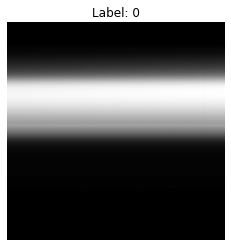

In [25]:
Pic=OutputImage(1002,1502)

In [26]:
Pic

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
import numpy as np 
from PIL import Image as im 

data = im.fromarray(Pic) 
      
# saving the final output  
# as a PNG file 
data.save('Test.png') 